<a href="https://colab.research.google.com/github/dellaanima/NLP_GoingDeeper/blob/main/02/BoW_DTM_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of Words & DTM (Document Term Matrix)

- About "BoW" Sum Up
  - 각 단어가 문서에 나타나는 빈도를 카운팅해서 벡터로 표현!
  - 당연히, 이 방식으로 벡터화 하면 어순에 따라 달라지는 의미 반영 못하지 ( I ate lunch. = Lunch ate I)


**Keras Tokenzier 활용**

In [ ]:
# Keras Tokenizer 로 구현
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


- 단어장(Vocabulary) : 단어장이란 중복을 제거한 단어들의 집합

- CountVectorizer는 scikit-learn 라이브러리에서 제공하는 클래스로, 텍스트 데이터를 수치적인 피처 벡터로 변환하기 위해 사용



- Bag of words를 사용하여 문서 간 유사도를 비교하기 위한 행렬을 만들면, 이를 DTM(문서 단어 행렬, Document-Term Matrix)

**scikit-learn CountVectorizer 활용**

- CountVectorizer Class 의 vector.fit_transform(sentence) 함수
 - 주어진 Text Data 를 feature vector 로 변환하는 과정을 수행
 - 반환 값 : 문서-단어 매트릭스(Document-Term Matrix, DTM)

 - 작동 방식
    - 먼저, CountVectorizer 인스턴스를 생성한 후, fit_transform() 함수를 사용하여 입력된 텍스트 데이터를 처리합니다. 이 함수는 다음과 같은 단계로 작동합니다:

     Fit: CountVectorizer는 입력 데이터를 분석하여 각 단어의 빈도를 파악합니다. 이 과정은 입력 데이터에 등장하는 단어의 종류와 빈도수를 학습합니다.

     Transform: 학습한 내용을 기반으로 입력 데이터를 피처 벡터로 변환합니다. 각 문서에 대해 단어의 빈도를 카운트하여 피처 벡터를 생성합니다. 이 피처 벡터는 문서의 단어 빈도를 나타내며, 각 단어의 인덱스에 해당하는 위치에 빈도수를 기록합니다.

     결과적으로 DTM 반환 : DTM은 문서 수 × 단어 수 크기의 행렬로, 각 문서에 대한 단어의 빈도 정보를 담고 있음.


In [4]:
# scikit-learn CountVectorizer 활용
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games.", "John and Mary  will watch the football game tonight."]

# CountVectorizer 인스턴스 생성
vector = CountVectorizer()

# sentence 텍스트 데이터를 피처 벡터로 변환
print(vector.fit_transform(sentences))
print(type(vector.fit_transform(sentences)))


  (0, 5)	1
  (0, 6)	3
  (0, 10)	2
  (0, 13)	2
  (0, 8)	2
  (0, 7)	2
  (0, 12)	1
  (0, 0)	1
  (0, 2)	1
  (0, 4)	1
  (1, 5)	1
  (1, 13)	1
  (1, 7)	1
  (1, 2)	1
  (1, 1)	1
  (1, 14)	1
  (1, 9)	1
  (1, 3)	1
  (1, 11)	1
<class 'scipy.sparse._csr.csr_matrix'>


- 위에 출력 결과에서 "(0, 5)	1" 이것은 (문서 인덱스, 단어 인덱스) 위치에 해당하는 원소의 값의 빈도수가 1 임을 의미
- 위에는 문서가 2개 있으니까 문서 인덱스는 0,1  



- <class 'scipy.sparse._csr.csr_matrix'>
 - `scipy.sparse._csr.csr_matrix`는 Compressed Sparse Row Matrix의 약자로, SciPy 라이브러리에서 사용되는 희소 행렬(sparse matrix)의 한 유형입니다.
 - SciPy란? : SciPy('사이파이'라고 읽음)는 과학기술계산을 위한 Python 라이브러리이다. NumPy, Matplotlib, pandas, SymPy와 연계되어 있다(특히 NumPy와)
 - `fit_transform` 함수는 텍스트 데이터를 피처 벡터로 변환하는 데 사용되며, 반환된 값은 희소 행렬 형식인 CSR 행렬입니다.

 - 이 희소 행렬은 대부분의 원소가 0인 경우에 효율적으로 메모리를 관리하기 위한 방식으로 구현되어 있습니다. CSR 행렬은 행 인덱스 배열, 열 인덱스 배열 및 데이터 배열로 구성됩니다. 출력 결과에서 각 줄은 하나의 원소를 나타내며, `(행 인덱스, 열 인덱스) 값`과 해당 위치의 값이 나타나있습니다.


In [7]:
bow = vector.fit_transform(sentences).toarray()

print('Bag of Words : \n',bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.


Bag of Words : 
 [[1 0 1 0 1 1 3 2 2 0 2 0 1 2 0]
 [0 1 1 1 0 1 0 1 0 1 0 1 0 1 1]]
각 단어의 인덱스 : {'john': 5, 'likes': 6, 'to': 10, 'watch': 13, 'movies': 8, 'mary': 7, 'too': 12, 'also': 0, 'football': 2, 'games': 4, 'and': 1, 'will': 14, 'the': 9, 'game': 3, 'tonight': 11}


- .toarray() 메서드 호출은 CSR 희소 행렬을 밀집 배열로 변환합니다. 이때, 희소 행렬의 모든 원소를 메모리 상에 로드하여 2차원 배열로 변환합니다.


- 즉, CounterVectorizer의 vector.fit_transform(입력 문장).toarray()으로 출력되는 Bag of Words 결과를 보면 각 단어의 빈도만 출력될 뿐, 어떤 단어의 빈도인지는 나오지 않습니다.
- 이는 vector.vocabulary_를 통해서 각 단어에 부여된 인덱스를 확인하면 됩니다.


In [8]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 15


- 간단하게 말해서, DTM 은 여러 문서의 BoW 를 하나의 행렬로 구현한 것!
-  DTM을 사용하면 각 문서들을 비교하고, 각 문서 간 유사도를 구할 수 있게 됩니다.

- 각 문서 벡터의 유사도를 구해보겠습니다.(코사인 유사도)

- 코사인 유사도 (cosθ)
  - 코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다.
  - 두 벡터 간의 유사도를 측정하는 방법 중 하나이며 두 벡터의 방향이 얼마나 유사한지를 나타내는 측정 지표로, 두 벡터가 이루는 각도의 코사인 값으로 계산됩니다.

  - 코사인 유사도는 보통 -1과 1 사이의 값으로 나타내며, 두 벡터의 방향이 완전히 동일한 경우 1이 됩니다. 반대로, 두 벡터의 방향이 완전히 반대인 경우 -1이 됩니다. 두 벡터가 서로 독립적인 경우에는 0에 가까운 값이 나타납니다

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

# 코사인 유사도 : 내적 / 각각의 크기
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

- DTM의 한계점

    - DTM 행과 열은 대부분의 값이 0을 가진다는 특징이 있습니다. 이는 저장 공간 측면에서 낭비입니다. (워드 임베딩 챕터에서 배우겠지만, 지나친 차원의 크기는 차원의 저주라는 또 다른 문제를 발생시킵니다.)

    - 오직 단어의 빈도에만 집중하는 방법 자체의 한계
      
      예를 들어, 영어 데이터를 가지고 DTM을 만들었을 때, 불용어 'the'는 어떤 문서에서도 자주 등장하는 경향이 있습니다. 그런데 문서1과 문서2에서 둘 다 'the'가 많이 등장했다고 하여 이 두 문서가 유사한 문서라고 봐도 되는건가?

     중요한 단어와 중요하지 않은 단어들이 혼재되어 있는데 문서에서, 'the'와 같이 아무 문서에나 자주 등장하는 단어들은 문서끼리 비교할 때 그다지 도움이 되지 않는다. 그렇다면 중요한 단어와 중요하지 않은 단어에 가중치를 따로 선별해서 주는 방법은 없을까요? --> Term Frequency-Inverse Document Frequency


# TF-IDF (Term Frequency-Inverse Document Frequency)

- "모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단!
- 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단!

- TF-IDF는 불용어처럼 중요도가 낮으면서 모든 문서에 등장하는 단어들이 노이즈가 되는 것을 완화해 줍니다.
- 주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점입니다.

- TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용합니다.

- DTM 은 이미 TF (Term Frequency) 행렬, 그러니까 DTM 에다가 IDF Inverse Document Frequency 값을 곱해주면 TF-IDF 가 되는 것!

- TF-IDF 수식
  - 뒤에 log 값이 IDF 를 계산한 방식이겠죠..

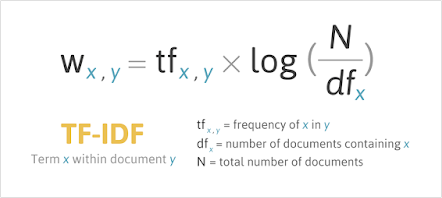

- IDF 값 예시로 직접 계산해보기


    Question. 전체 문서의 수가 5개라고 해봅시다. 그리고 단어 'like'가 문서2에서 200번, 문서 3에서 300번 등장했다고 해봅시다. 다른 문서에서 단어 'like'는 등장하지 않았습니다. 이때, 단어 'like'의 IDF 및 문서2, 문서3 에서 TF-IDF 는 몇일까요?

    N : 5
    df(x) : 2
    IDF = log(5/2) or ln(5/2)

    문서2에서의 TF는 200, 문서3에서의 TF는 300
    문서2의 단어 'like'의 TF-IDF를 구하면 200×ln(⁡5/2)​, 즉 183.258146375입니다.
    문서3에서의 단어 'like'의 TF-IDF는 300×ln⁡(5/2) 계산하면 274.887219562입니다.

## TF - IDF 직접 구현하기

In [1]:
from math import log
import pandas as pd

In [2]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',
]

- 단어장 생성

In [3]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [4]:
N = len(docs) # 총 문서의 수
N

3

이제 TF 함수, IDF 함수, TF-IDF 함수를 만들겠습니다.

여기서 IDF를 실제 구현할 때는 앞서 배운 식과는 다소 다른 식을 사용하게 됩니다. 실제로 많은 파이썬 패키지들이 앞에서 배운 식에서 조금씩 조정된, 서로 다른 식을 사용합니다.

우선, 여기서는 log 항의 분모에 1을 더해주겠습니다. 이는 (Bag of Words를 사용할 때 일반적인 상황은 아니지만) 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다. 그리고 log 항에 1을 더해주겠습니다. 이는 log⁡log 항의 분자와 분모값이 동일해졌을 때, log⁡log의 진수가 1이 됨에 따라서 IDF의 값이 0이 되는 것을 방지하기 위함입니다.

In [10]:
def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1)) + 1

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [6]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [7]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [8]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer 활용해서 TF-IDF 로 벡터화하기

사이킷런으로 DTM을 만들기 위해서는 CountVectorizer를 사용했었습니다. 이와 유사하게 사이킷런에서는 TF-IDF를 자동으로 계산하여 출력하는 TfidfVectorizer를 제공합니다.

향후 실습 중에 결괏값이 예상과 달라 혼란이 일어나는 일이 없도록 미리 언급하자면, 사이킷런의 TfidfVectorizer 또한 이번에 배운 기본식에서 조정된 식을 사용합니다. 간단히 언급하면, TfidfVectorizer는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 log 항의 분자에도 1을 더해주며, TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다릅니다.

사이킷런의 TfidfVectorizer를 통해 TF-IDF 행렬을 출력해봅시다.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634
